<a href="https://colab.research.google.com/github/tristontan/StatSmith/blob/main/DSA3101_(A)_Q1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


CHECKING DATAFRAME


In [20]:
import pandas as pd
import numpy as np
import sqlite3
data = pd.read_excel('/content/drive/MyDrive/DSA3101 Data/Processed Data/Survey_cleaned_balanced.xlsx')

!pip install gspread oauth2client
from google.colab import auth
auth.authenticate_user()

print(len(data))
data.tail()



10511


,Survey_ID,Age,Gender,Tourist/Local,USS companion [Children],USS companion [Colleagues],USS companion [Family],USS companion [Friends],USS companion [None],USS companion [Significant other],...,Purchasing factors [Loyalty Points],Purchasing factors [Clear Pricing Information],"Purchasing factors [Multiple Payment Options (E.g. Credit Card, PayPal)]",Purchasing factors [Clear Refund and Exchange Policies],Purchasing factors [Fast Checkout Process],Purchasing factors [Personalised Recommendations based on Visitor Preferences],Purchasing factors [Live Chat/Support for Booking Assistance],Purchasing factors [Option to Add-On Parking Passes during Purchase],Suggestions for improving USS experience,Suggestions for improving USS website
10506,10507,3,1,1,0,0,0,0,0,0,...,3,4,3,3,3,3,2,2,nil,nil
10507,10508,3,2,1,0,0,1,1,0,0,...,3,4,4,4,4,3,4,3,nil,nil
10508,10509,3,1,1,0,0,0,0,0,0,...,3,4,3,3,3,3,4,2,nil,nil
10509,10510,5,2,1,0,0,0,1,0,0,...,3,5,3,4,3,1,2,3,nil,nil
10510,10511,1,1,1,0,0,1,0,0,0,...,3,4,4,4,4,4,2,2,nil,nil


Columns used for overall satisfaction: ['USS experience rating [Variety of Rides and Attractions]', 'USS experience rating [Entertainment and Shows (e.g. Rollercoasters, WaterWorld Performance)]', 'USS experience rating [Waiting Time]', 'USS experience rating [Cleanliness of Park and Amenities]', 'USS experience rating [Staff Friendliness]', 'USS experience rating [Availability of Rest Areas]', 'USS experience rating [Quality and Variety of Food/Beverage Options]', 'USS experience rating [Crowdedness]', 'USS experience rating [Value for Money (Entrance Fee, Food, etc)]', 'USS experience rating [Variety and Quality of Souvenir Shops]', 'USS experience rating [Theme and Atmosphere]', 'USS experience rating [Special Events and Performances (E.g. Halloween Horror Night)]', 'USS experience rating [Presence of Shaded Rest Areas]', 'USS experience rating [Weather on the Day of Visit]', 'USS experience rating [Park Layout and Navigation]', 'USS experience rating [Accessibility (Wheelchair frie

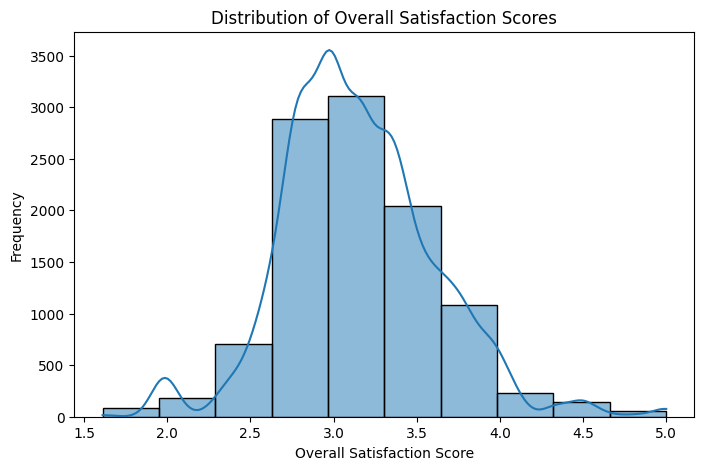

In [ ]:
## finding overall satisfaction scores using all columns involving USS experience rating
import matplotlib.pyplot as plt
import seaborn as sns

#finding overall satisfaction involving all the column headers which mention USS experience rating
rating_columns = [col for col in data.columns if 'USS experience rating' in col]
print("Columns used for overall satisfaction:", rating_columns) #just in case (wna check if ive got the right rows)

print(data.columns.tolist())

data['Overall_Satisfaction'] = data[rating_columns].mean(axis=1)
X = data.drop(['Overall_Satisfaction', 'Survey_ID'], axis=1, errors='ignore')  # drop unnecessary columns
y = data['Overall_Satisfaction']

data['Overall_Satisfaction_Category'] = pd.cut(data['Overall_Satisfaction'], bins=[0, 3, 7, 10], labels=['Low', 'Medium', 'High'])
y = data['Overall_Satisfaction_Category']

# plot
plt.figure(figsize=(8, 5))
sns.histplot(data['Overall_Satisfaction'], kde=True, bins=10)
plt.title("Distribution of Overall Satisfaction Scores")
plt.xlabel("Overall Satisfaction Score")
plt.ylabel("Frequency")
plt.show()



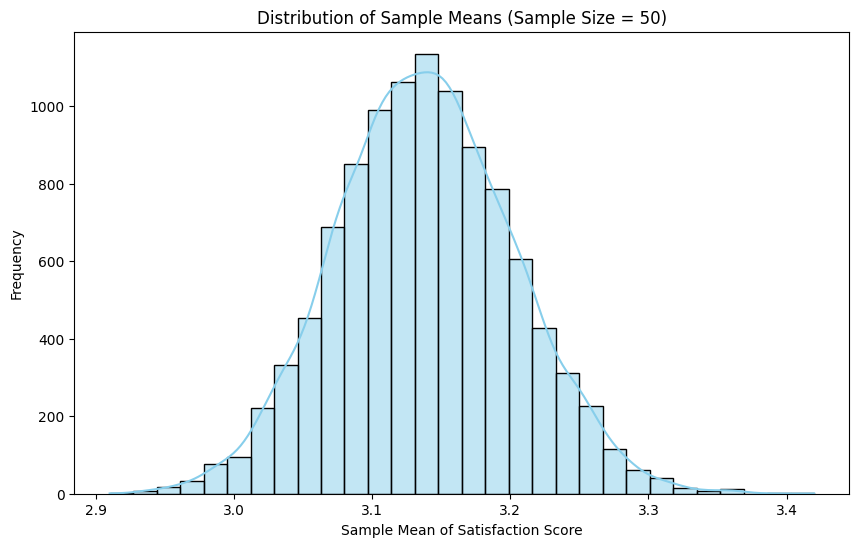

In [ ]:
## intending to use central limit theorem because my sample size is larger than 30
# use of statistical analysis for a more reliable result
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('/content/drive/MyDrive/DSA3101 Data/Processed Data/Survey_cleaned_balanced.xlsx')
uss_columns = ['USS experience rating [Variety of Rides and Attractions]', 'USS experience rating [Entertainment and Shows (e.g. Rollercoasters, WaterWorld Performance)]', 'USS experience rating [Waiting Time]','USS experience rating [Cleanliness of Park and Amenities]','USS experience rating [Staff Friendliness]','USS experience rating [Availability of Rest Areas]','USS experience rating [Quality and Variety of Food/Beverage Options]','USS experience rating [Crowdedness]','USS experience rating [Value for Money (Entrance Fee, Food, etc)]','USS experience rating [Variety and Quality of Souvenir Shops]','USS experience rating [Theme and Atmosphere]','USS experience rating [Special Events and Performances (E.g. Halloween Horror Night)]','USS experience rating [Presence of Shaded Rest Areas]','USS experience rating [Weather on the Day of Visit]','USS experience rating [Park Layout and Navigation]','USS experience rating [Accessibility (Wheelchair friendly, etc)]','USS experience rating [Parking Convenience and Accessibility]','USS experience rating [Parking Convenience and Accessibility]']
data['overall_satisfaction'] = data[uss_columns].mean(axis=1)

satisfaction_scores = data['overall_satisfaction']

sample_size = 50
num_samples = 10511

sample_means = [np.mean(np.random.choice(satisfaction_scores, sample_size)) for _ in range(num_samples)]

# Plot the distribution of sample means
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, bins=30, kde=True, color='skyblue')
plt.title(f'Distribution of Sample Means (Sample Size = {sample_size})')
plt.xlabel('Sample Mean of Satisfaction Score')
plt.ylabel('Frequency')
plt.show()

## shows a normal distribution curve since i used clt

Unique values and counts in 'Tourist/Local':
Tourist/Local
2    6690
1    3821
Name: count, dtype: int64

Unique values and counts in 'Rating experience':
Rating experience
4    5431
3    4362
5     528
2     190
Name: count, dtype: int64


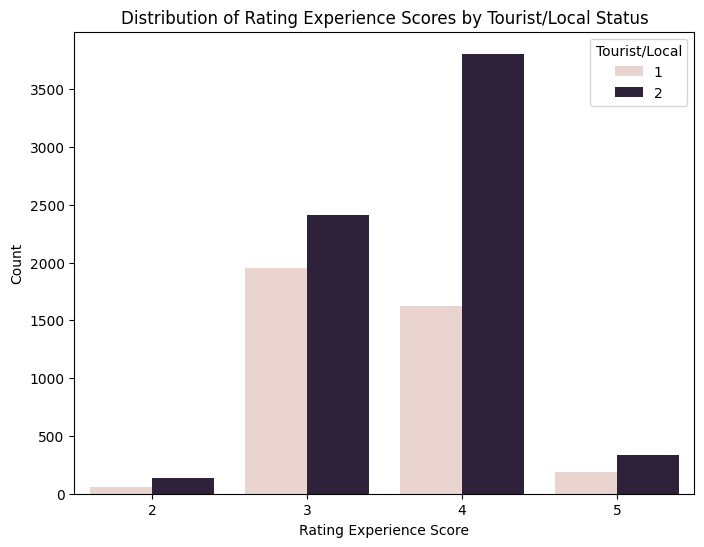

In [4]:
## RELATING TOURIST/LOCAL STATUS TO EXPERIENCE RATINGS


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_excel('/content/drive/MyDrive/DSA3101 Data/Processed Data/Survey_cleaned_balanced.xlsx')

#MAKE SURE IM USING THE CORRECT DATA
print("Unique values and counts in 'Tourist/Local':")
print(data['Tourist/Local'].value_counts())

print("\nUnique values and counts in 'Rating experience':")
print(data['Rating experience'].value_counts())

# PLOT COUNT PLOT
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating experience', hue='Tourist/Local', data=data)
plt.title("Distribution of Rating Experience Scores by Tourist/Local Status")
plt.xlabel("Rating Experience Score")
plt.ylabel("Count")
plt.show()

## one noticeable limitation from the unique count of tourist/locals is that there are significantly more data points from locals in comparison to tourists

Unique values and counts in 'Tourist/Local':
Tourist/Local
2    6690
1    3821
Name: count, dtype: int64

Unique values and counts in 'Rating experience':
Rating experience
4    5431
3    4362
5     528
2     190
Name: count, dtype: int64


<ipython-input-5-276a17f3f4dd>:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Tourist/Local'] == 1], x='Rating experience', label='Tourist', shade=True, bw_adjust=0.5)
<ipython-input-5-276a17f3f4dd>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Tourist/Local'] == 2], x='Rating experience', label='Local', shade=True, bw_adjust=0.5)


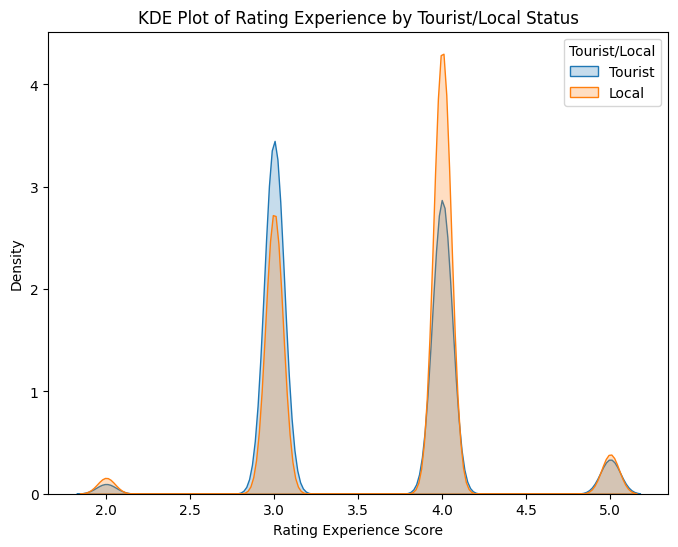

In [5]:
## visualisation to combat the limitation faced by the large discrepancy between number of locals and tourist
## attempting to plot a KDE plot

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure proper data usage
print("Unique values and counts in 'Tourist/Local':")
print(data['Tourist/Local'].value_counts())

print("\nUnique values and counts in 'Rating experience':")
print(data['Rating experience'].value_counts())



# Plot KDE for each Tourist/Local group
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data[data['Tourist/Local'] == 1], x='Rating experience', label='Tourist', shade=True, bw_adjust=0.5)
sns.kdeplot(data=data[data['Tourist/Local'] == 2], x='Rating experience', label='Local', shade=True, bw_adjust=0.5)

plt.title("KDE Plot of Rating Experience by Tourist/Local Status")
plt.xlabel("Rating Experience Score")
plt.ylabel("Density")
plt.legend(title="Tourist/Local")
plt.show()

Index(['Survey_ID', 'Age', 'Gender', 'Tourist/Local',
       'USS companion [Children]', 'USS companion [Colleagues]',
       'USS companion [Family]', 'USS companion [Friends]',
       'USS companion [None]', 'USS companion [Significant other]',
       ...
       'Purchasing factors [Loyalty Points]',
       'Purchasing factors [Clear Pricing Information]',
       'Purchasing factors [Multiple Payment Options (E.g. Credit Card, PayPal)]',
       'Purchasing factors [Clear Refund and Exchange Policies]',
       'Purchasing factors [Fast Checkout Process]',
       'Purchasing factors [Personalised Recommendations based on Visitor Preferences]',
       'Purchasing factors [Live Chat/Support for Booking Assistance]',
       'Purchasing factors [Option to Add-On Parking Passes during Purchase]',
       'Suggestions for improving USS experience',
       'Suggestions for improving USS website'],
      dtype='object', length=173)
Average Dissatisfaction Scores:
Rating experience              

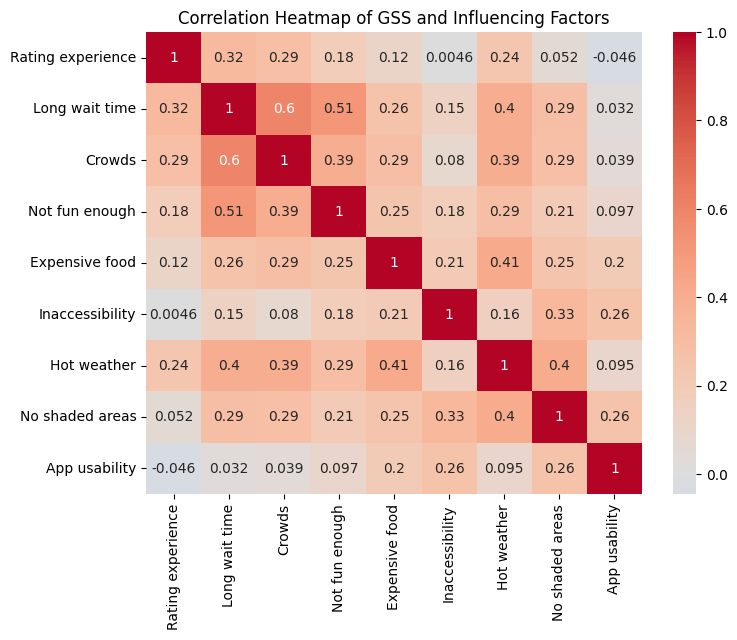

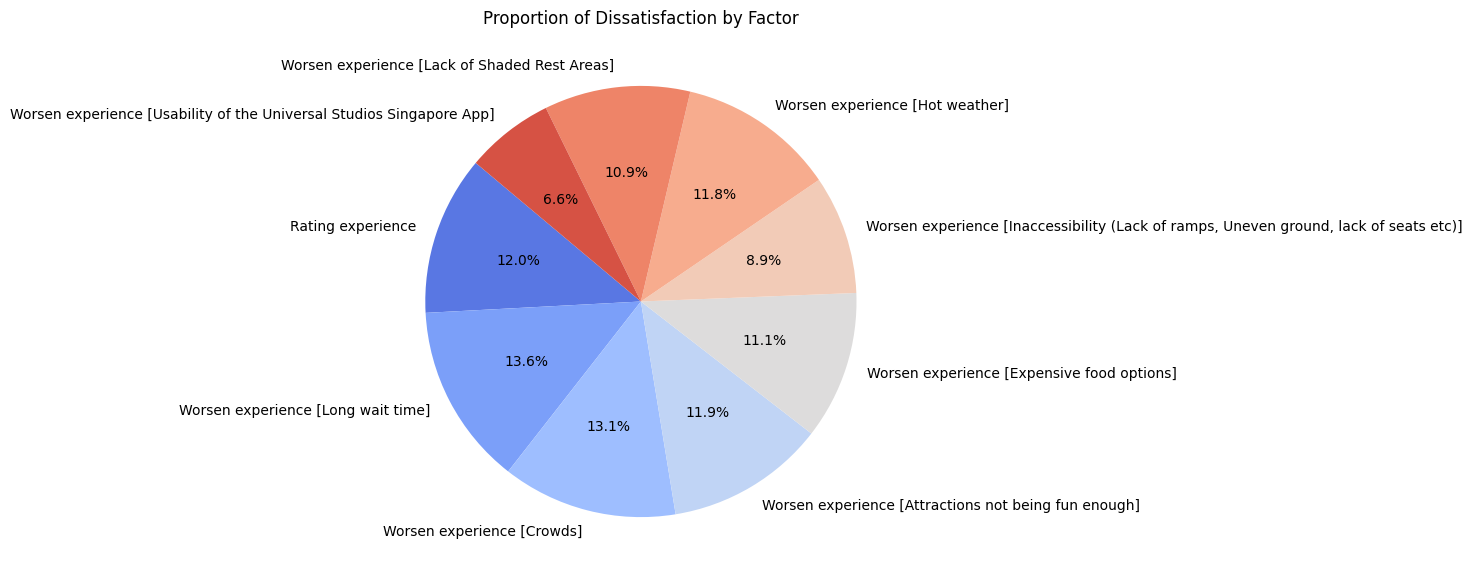

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_excel('/content/drive/MyDrive/DSA3101 Data/Processed Data/Survey_cleaned_balanced.xlsx')
# Define columns for GSS and factors influencing satisfaction

print(data.columns)
GSS_column = "Rating experience"  # Column name for the overall guest satisfaction score

columns_of_interest = [
    'Worsen experience [Long wait time]',
    'Worsen experience [Crowds]',
    'Worsen experience [Attractions not being fun enough]',
    'Worsen experience [Expensive food options]',
    'Worsen experience [Inaccessibility (Lack of ramps, Uneven ground, lack of seats etc)]',
    'Worsen experience [Hot weather]',
    'Worsen experience [Lack of Shaded Rest Areas]',
    'Worsen experience [Usability of the Universal Studios Singapore App]'
]
# Check if "Rating experience" exists in data
if "Rating experience" not in data.columns:
    print("Warning: 'Rating experience' column not found in dataset.")
else:
    columns_of_interest = ["Rating experience"] + columns_of_interest


data = data[columns_of_interest]
# average dissatisfaction score for each factor
## useful for finding out which factors contribute most to the dissatisfaction of the USS visitors
average_dissatisfaction = data.mean()
print("Average Dissatisfaction Scores:")
print(average_dissatisfaction)

#result:
#Average Dissatisfaction Scores:
#Rating experience                                                                        3.599087
#Worsen experience [Long wait time]                                                       4.097136
#Worsen experience [Crowds]                                                               3.954048
#Worsen experience [Attractions not being fun enough]                                     3.594139
#Worsen experience [Expensive food options]                                               3.348682
#Worsen experience [Inaccessibility (Lack of ramps, Uneven ground, lack of seats etc)]    2.682713
#Worsen experience [Hot weather]                                                          3.546761
#Worsen experience [Lack of Shaded Rest Areas]                                            3.297212
#Worsen experience [Usability of the Universal Studios Singapore App]                     1.994197
## CAN CONCLUDE THAT THE GREATEST CONTRIBUTION TO DISSATISFACTION WAS : LONG WAIT TIME


# shorten the axis labels
factors_shortened = {
    "Worsen experience [Long wait time]": "Long wait time",
    "Worsen experience [Crowds]": "Crowds",
    "Worsen experience [Attractions not being fun enough]": "Not fun enough",
    "Worsen experience [Expensive food options]": "Expensive food",
    "Worsen experience [Inaccessibility (Lack of ramps, Uneven ground, lack of seats etc)]": "Inaccessibility",
    "Worsen experience [Hot weather]": "Hot weather",
    "Worsen experience [Lack of Shaded Rest Areas]": "No shaded areas",
    "Worsen experience [Usability of the Universal Studios Singapore App]": "App usability"
}

correlation_matrix = data[["Rating experience"] + list(factors_shortened.keys())].corr()

# rename the columns and index of the correlation matrix
correlation_matrix.rename(columns=factors_shortened, index=factors_shortened, inplace=True)

# plot heatmap that correlates guest satisfaction score(GSS) and dissatisfaction influencing factors
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of GSS and Influencing Factors")
plt.show()


#pie chart of proportion of dissatisaction caused by each influencing factor
average_dissatisfaction_percent = (average_dissatisfaction / average_dissatisfaction.sum()) * 100

plt.figure(figsize=(10, 7))
plt.pie(average_dissatisfaction_percent, labels=average_dissatisfaction.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("coolwarm", len(average_dissatisfaction.index)))
plt.title("Proportion of Dissatisfaction by Factor")
plt.show()

In [21]:
# Define threshold for poor experience (3 and below)
poor_experience_threshold = 3

# Filter data for respondents with poor general experience ratings
poor_experience_df = data[data["Rating experience"] <= poor_experience_threshold]


In [23]:
# Calculate mean influence rating and percentage of high influence (4 or 5) for each factor
results = []

for factor in columns_of_interest:
    mean_influence = poor_experience_df[factor].mean()  # Mean influence rating
    high_influence_pct = (poor_experience_df[factor] >= 4).mean() * 100  # % of high influence ratings (4 or 5)

    results.append({
        "Factor": factor,
        "Mean Influence Rating": mean_influence,
        "High Influence Rating (%)": high_influence_pct
    })

# Convert results to DataFrame and sort
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by=["High Influence Rating (%)", "Mean Influence Rating"], ascending=[False, False])
print(results_df)
plt.show()

###
#Knowing the mean and percentage of high influence ratings for each factor can help prioritize areas that most affect guest dissatisfaction.
#Factors with a high percentage of 4 or 5 ratings indicate that a significant portion of respondents feel strongly impacted by these issues,
#suggesting they are critical pain points. By focusing on these high-influence factors,
#you can identify the main areas to target for improving guest satisfaction
# and guide USS in addressing the most pressing concerns that negatively affect the overall experience.

                                              Factor  Mean Influence Rating  \
0                 Worsen experience [Long wait time]               3.726714   
1                         Worsen experience [Crowds]               3.646968   
2  Worsen experience [Attractions not being fun e...               3.367970   
5                    Worsen experience [Hot weather]               3.274605   
6      Worsen experience [Lack of Shaded Rest Areas]               3.217047   
3         Worsen experience [Expensive food options]               3.211775   
4  Worsen experience [Inaccessibility (Lack of ra...               2.681019   
7  Worsen experience [Usability of the Universal ...               2.050308   

   High Influence Rating (%)  
0                  59.688049  
1                  51.801406  
2                  42.596661  
5                  37.324253  
6                  36.313708  
3                  30.953427  
4                  12.214411  
7                   6.788225  


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.nonparametric.smoothers_lowess import lowess
data = pd.read_excel('/content/drive/MyDrive/DSA3101 Data/Processed Data/Survey_cleaned_balanced.xlsx')
data = data.drop(['Suggestions for improving USS experience', 'Suggestions for improving USS website'], axis=1)
corr_matrix1 = data.corr()

subset1 = data[['Return factors [Good Customer Service]', 'Rating experience']]
corr_matrix2 = subset1.corr()
print(corr_matrix2)

subset2 = data[['Return factors [Ticket Discounts and Promotions]', 'Rating experience']]
corr_matrix3 = subset2.corr()
print(corr_matrix3)

##'USS experience rating [Cleanliness of Park and Amenities]',
##'USS experience rating [Variety of Rides and Attractions]',
##'USS experience rating [Staff Friendliness]',
##'USS experience rating [Theme and Atmosphere]',
##'USS experience rating [Special Events and Performances (E.g. Halloween Horror Night)]

## CHOOSE THE FIVE MOST IMPORTANT EXPERIENCE

satsub1 = data[['USS experience rating [Cleanliness of Park and Amenities]', 'Rating experience']]
satsub2 = data[['USS experience rating [Variety of Rides and Attractions]', 'Rating experience']]
satsub3 = data[['USS experience rating [Staff Friendliness]', 'Rating experience']]
satsub4 = data[['USS experience rating [Theme and Atmosphere]', 'Rating experience']]
satsub5 = data[['USS experience rating [Special Events and Performances (E.g. Halloween Horror Night)]', 'Rating experience']]

satcorr1 = satsub1.corr()
print(satcorr1)
satcorr2 = satsub2.corr()
print(satcorr2)
satcorr3 = satsub3.corr()
print(satcorr3)
satcorr4 = satsub4.corr()
print(satcorr4)
satcorr5 = satsub5.corr()
print(satcorr5)

##most correlated : variety of rides and attraction
##least correlated : cleanliness and amenities


                                        Return factors [Good Customer Service]  \
Return factors [Good Customer Service]                                1.000000   
Rating experience                                                     0.260212   

                                        Rating experience  
Return factors [Good Customer Service]           0.260212  
Rating experience                                1.000000  
                                                  Return factors [Ticket Discounts and Promotions]  \
Return factors [Ticket Discounts and Promotions]                                          1.000000   
Rating experience                                                                         0.229634   

                                                  Rating experience  
Return factors [Ticket Discounts and Promotions]           0.229634  
Rating experience                                          1.000000  
                                                    USS 

Average Purchasing Factors Satisfaction Scores:
 Purchasing factors [Ease of Navigate USS Website/Booking Platform]                                              3.849967
Purchasing factors [Mobile App Integration]                                                                     3.209780
Purchasing factors [Option for Digital Tickets (No printing Required)]                                          3.888403
Purchasing factors [Access to Exclusive Perks (E.g. Fast Pass, VIP Access)]                                     3.604224
Purchasing factors [Deals for Tickets (E.g. Multi-Day Ticket Discounts, Family Bundles, Credit Card Offers)]    3.770431
Purchasing factors [Loyalty Points]                                                                             3.121872
Purchasing factors [Clear Pricing Information]                                                                  3.988488
Purchasing factors [Multiple Payment Options (E.g. Credit Card, PayPal)]                                

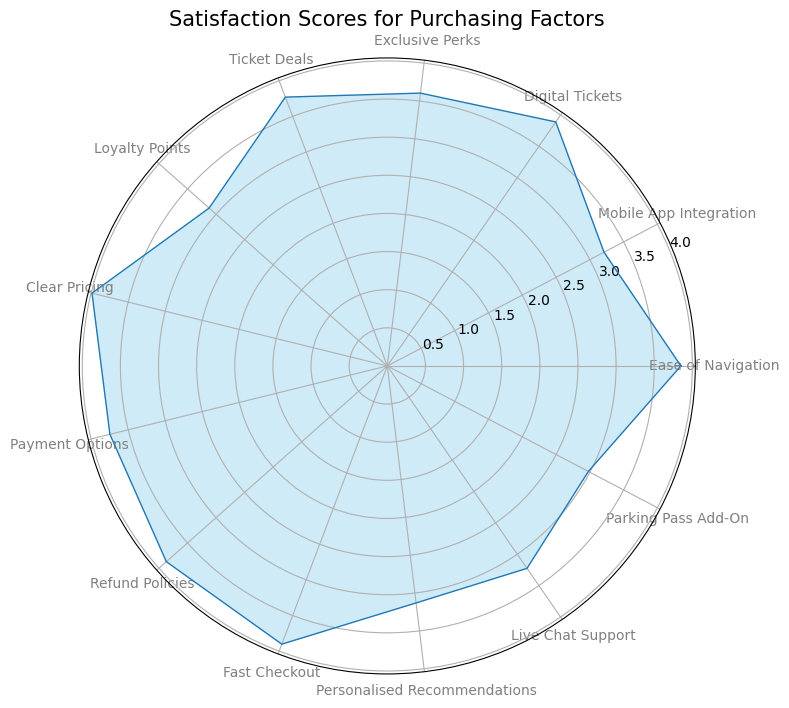

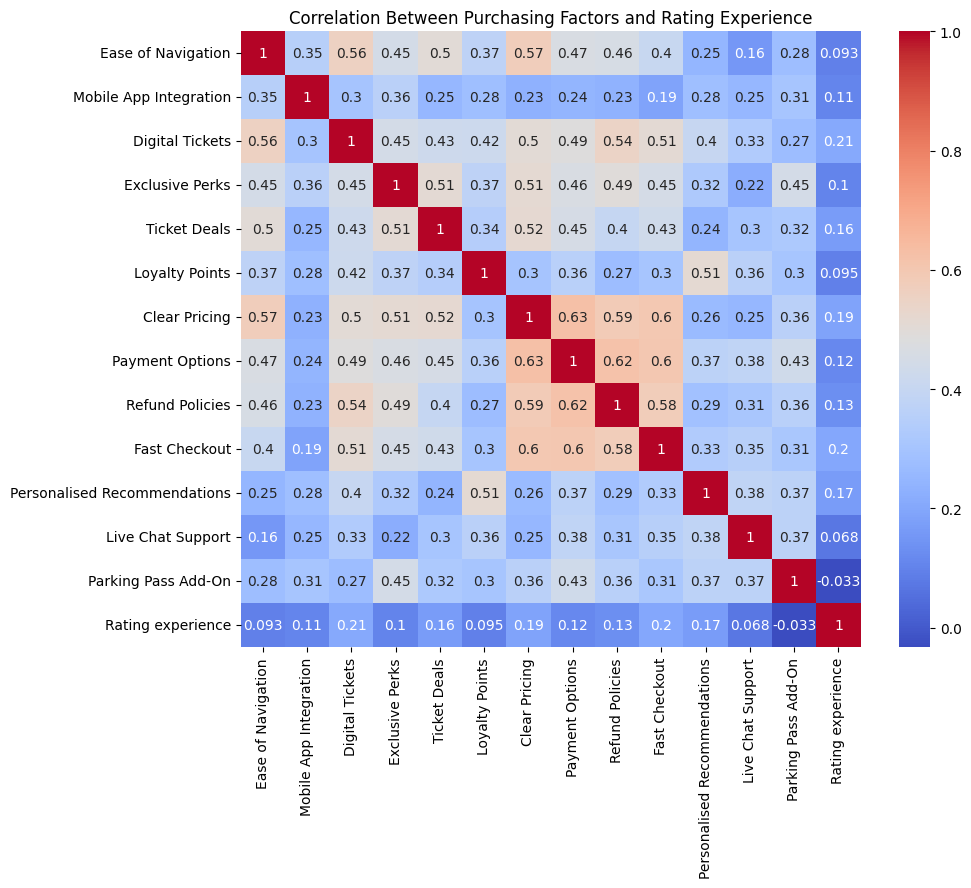

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_excel('/content/drive/MyDrive/DSA3101 Data/Processed Data/Survey_cleaned_balanced.xlsx')

# Define original and shortened column names
purchasing_factors = [
    'Purchasing factors [Ease of Navigate USS Website/Booking Platform]',
    'Purchasing factors [Mobile App Integration]',
    'Purchasing factors [Option for Digital Tickets (No printing Required)]',
    'Purchasing factors [Access to Exclusive Perks (E.g. Fast Pass, VIP Access)]',
    'Purchasing factors [Deals for Tickets (E.g. Multi-Day Ticket Discounts, Family Bundles, Credit Card Offers)]',
    'Purchasing factors [Loyalty Points]',
    'Purchasing factors [Clear Pricing Information]',
    'Purchasing factors [Multiple Payment Options (E.g. Credit Card, PayPal)]',
    'Purchasing factors [Clear Refund and Exchange Policies]',
    'Purchasing factors [Fast Checkout Process]',
    'Purchasing factors [Personalised Recommendations based on Visitor Preferences]',
    'Purchasing factors [Live Chat/Support for Booking Assistance]',
    'Purchasing factors [Option to Add-On Parking Passes during Purchase]'
]

purchasing_factors_shortened = {
    'Purchasing factors [Ease of Navigate USS Website/Booking Platform]': 'Ease of Navigation',
    'Purchasing factors [Mobile App Integration]': 'Mobile App Integration',
    'Purchasing factors [Option for Digital Tickets (No printing Required)]': 'Digital Tickets',
    'Purchasing factors [Access to Exclusive Perks (E.g. Fast Pass, VIP Access)]': 'Exclusive Perks',
    'Purchasing factors [Deals for Tickets (E.g. Multi-Day Ticket Discounts, Family Bundles, Credit Card Offers)]': 'Ticket Deals',
    'Purchasing factors [Loyalty Points]': 'Loyalty Points',
    'Purchasing factors [Clear Pricing Information]': 'Clear Pricing',
    'Purchasing factors [Multiple Payment Options (E.g. Credit Card, PayPal)]': 'Payment Options',
    'Purchasing factors [Clear Refund and Exchange Policies]': 'Refund Policies',
    'Purchasing factors [Fast Checkout Process]': 'Fast Checkout',
    'Purchasing factors [Personalised Recommendations based on Visitor Preferences]': 'Personalised Recommendations',
    'Purchasing factors [Live Chat/Support for Booking Assistance]': 'Live Chat Support',
    'Purchasing factors [Option to Add-On Parking Passes during Purchase]': 'Parking Pass Add-On'
}

# Calculate average satisfaction scores
average_purchasing_factors = data[purchasing_factors].mean()
print("Average Purchasing Factors Satisfaction Scores:\n", average_purchasing_factors)

# Radar Chart
labels = list(purchasing_factors_shortened.values())
stats = average_purchasing_factors.values
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
stats = np.concatenate((stats, [stats[0]]))  # Closing the circle
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], labels, color='grey', size=10)
ax.plot(angles, stats, linewidth=1, linestyle='solid')
ax.fill(angles, stats, 'skyblue', alpha=0.4)
plt.title("Satisfaction Scores for Purchasing Factors", size=15)
plt.show()

# Heatmap
purchasing_factors_with_satisfaction = purchasing_factors + ['Rating experience']
corr_matrix = data[purchasing_factors_with_satisfaction].corr()
corr_matrix.rename(index=purchasing_factors_shortened, columns=purchasing_factors_shortened, inplace=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between Purchasing Factors and Rating Experience")
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


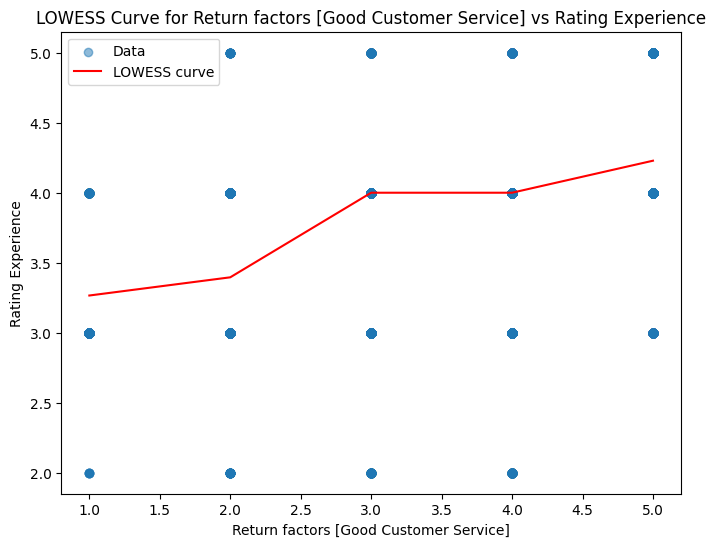

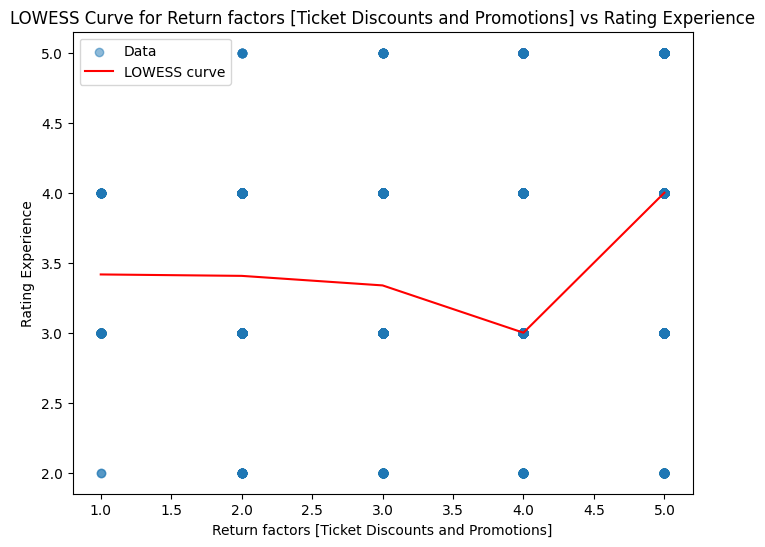

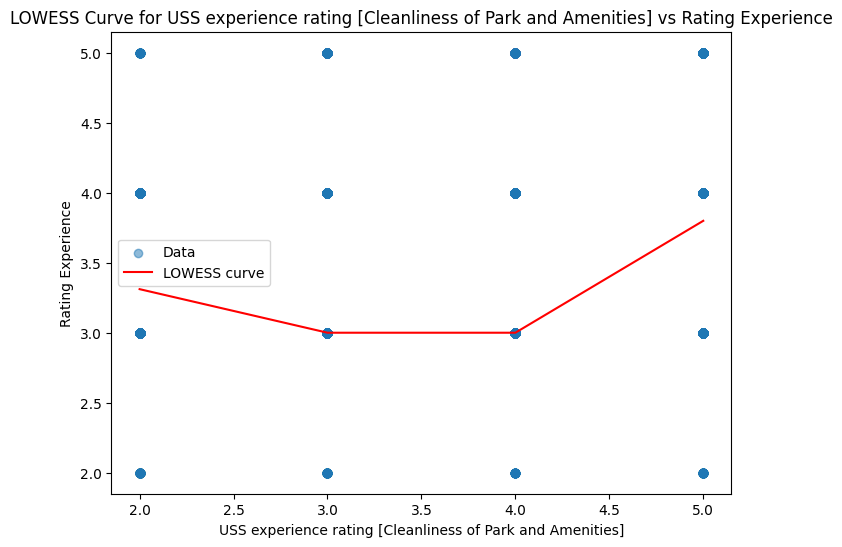

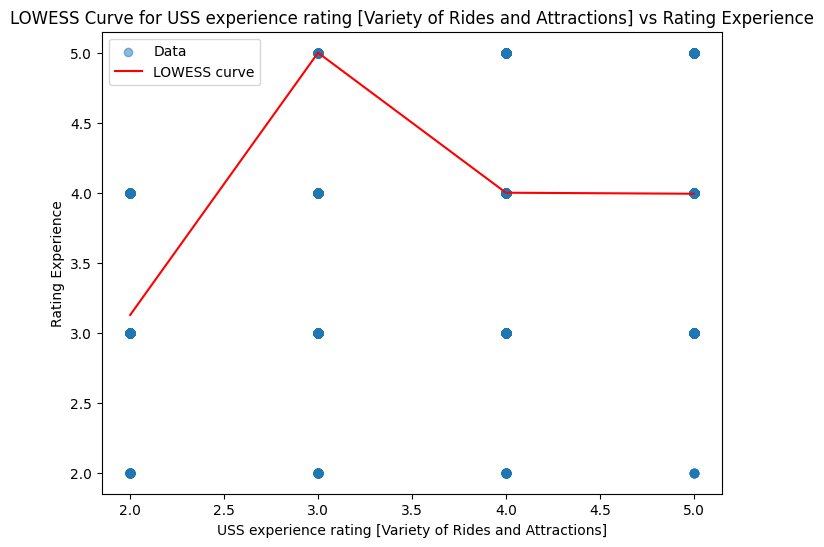

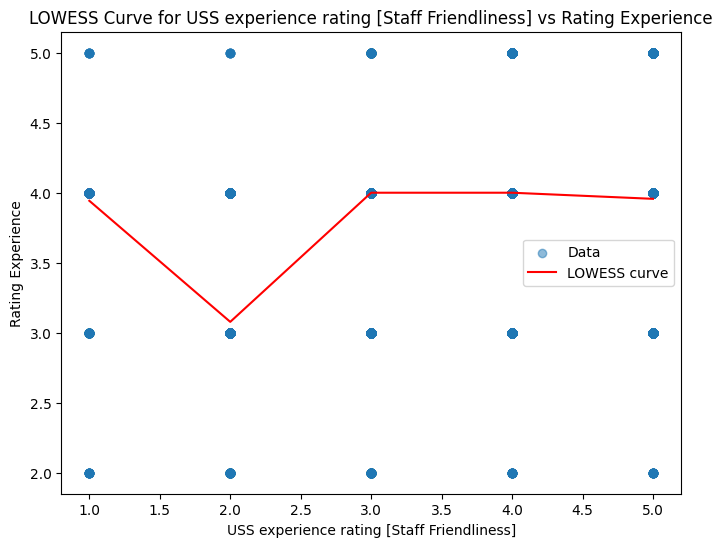

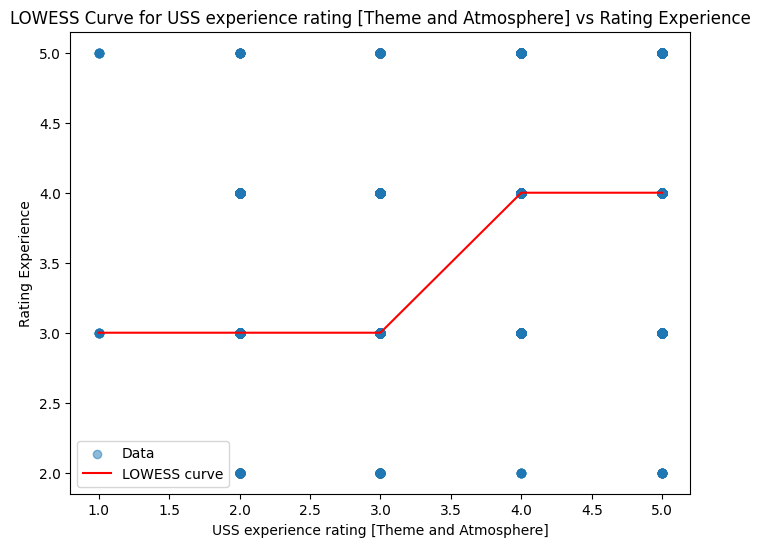

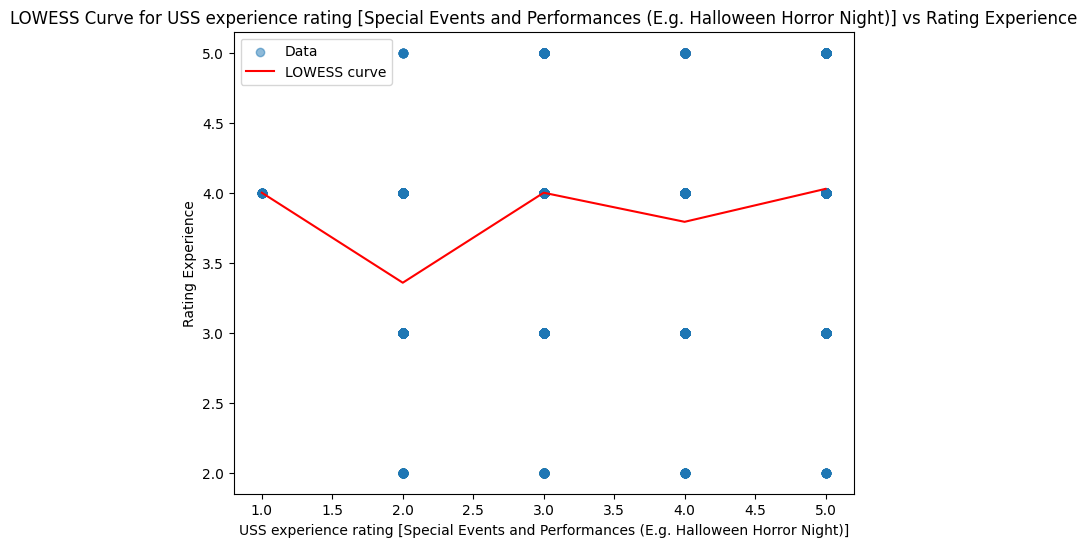

In [ ]:
# List of return factors and experience factors to plot
factors = [
    'Return factors [Good Customer Service]',
    'Return factors [Ticket Discounts and Promotions]',
    'USS experience rating [Cleanliness of Park and Amenities]',
    'USS experience rating [Variety of Rides and Attractions]',
    'USS experience rating [Staff Friendliness]',
    'USS experience rating [Theme and Atmosphere]',
    'USS experience rating [Special Events and Performances (E.g. Halloween Horror Night)]'
]



from statsmodels.nonparametric.smoothers_lowess import lowess

for factor in factors:
    smoothed = lowess(data['Rating experience'], data[factor], frac=0.3)
    plt.figure(figsize=(8, 6))
    plt.scatter(data[factor], data['Rating experience'], alpha=0.5, label='Data')
    plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', label='LOWESS curve')
    plt.title(f'LOWESS Curve for {factor} vs Rating Experience')
    plt.xlabel(factor)
    plt.ylabel('Rating Experience')
    plt.legend()
    plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is already loaded

# Reshape data to long format
melted_data = pd.melt(data, id_vars=['Ticket Purchase Avenue'], value_vars=ticket_purchasing_avenues,
                      var_name='Purchasing Avenue', value_name='Average Score')

# Plot all ticket purchasing avenues by ticket purchase avenue in a single bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_data, x='Ticket Purchase Avenue', y='Average Score', hue='Purchasing Avenue', palette="Blues_d")
plt.title("Average Scores by Ticket Purchase Avenue")
plt.xlabel("Ticket Purchase Avenue")
plt.ylabel("Average Score")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Purchasing Avenue")
plt.tight_layout()
plt.show()

Mounted at /content/drive
['Survey_ID', 'Age', 'Gender', 'Tourist/Local', 'USS companion [Children]', 'USS companion [Colleagues]', 'USS companion [Family]', 'USS companion [Friends]', 'USS companion [None]', 'USS companion [Significant other]', 'Visiting frequency', 'Visiting occasion [Free tickets]', 'Visiting occasion [Public holiday]', 'Visiting occasion [School holiday]', 'Visiting occasion [School/work event]', 'Visiting occasion [Special events]', 'Visiting occasion [Special occasion]', 'Visiting occasion [Weekdays]', 'Visiting occasion [Weekends]', 'Attractive factors [Food options]', 'Attractive factors [Types of rides available]', 'Attractive factors [Gift shops]', 'Attractive factors [Special events (e.g. Halloween Horror Night)]', 'Attractive factors [Accessibility]', 'Seasonal pass [Frequent visitor to USS]', 'Seasonal pass [Bundle price]', 'Seasonal pass [Eligibility during a holiday period]', 'Time enter', 'Time leave', 'Rating experience', 'Improve experience [Short wai

<ipython-input-2-7fdf25c173d8>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=melted_data, x='Purchasing Avenue', y='Average Score', palette="Blues_d")


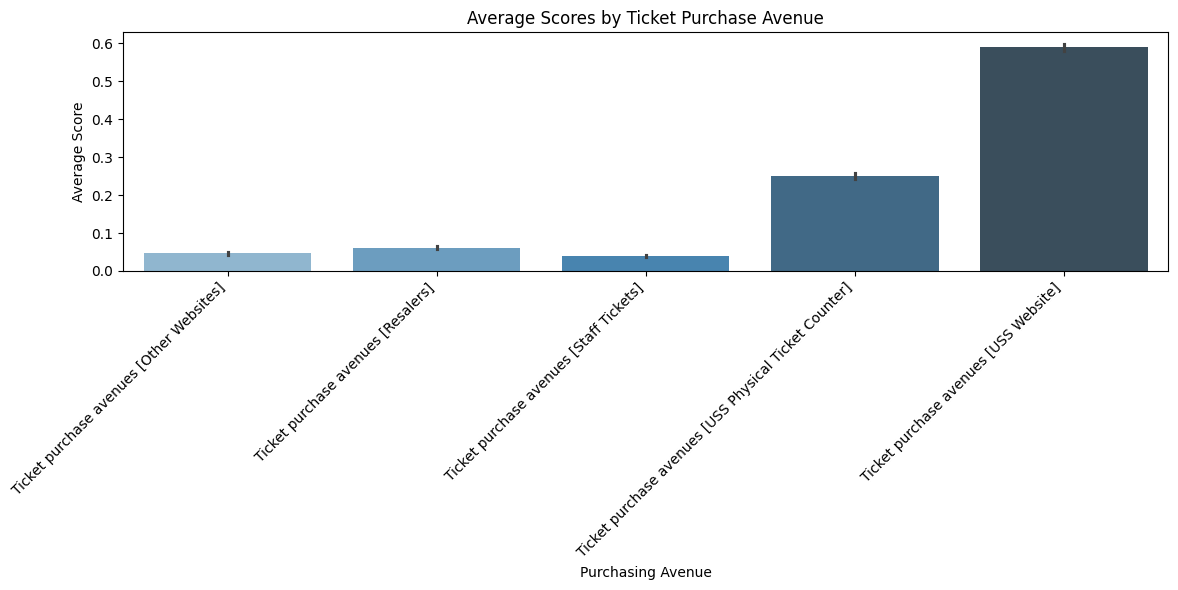

<ipython-input-2-7fdf25c173d8>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=melted_data, x='Purchasing Avenue', y='Average Score', palette="Blues_d")


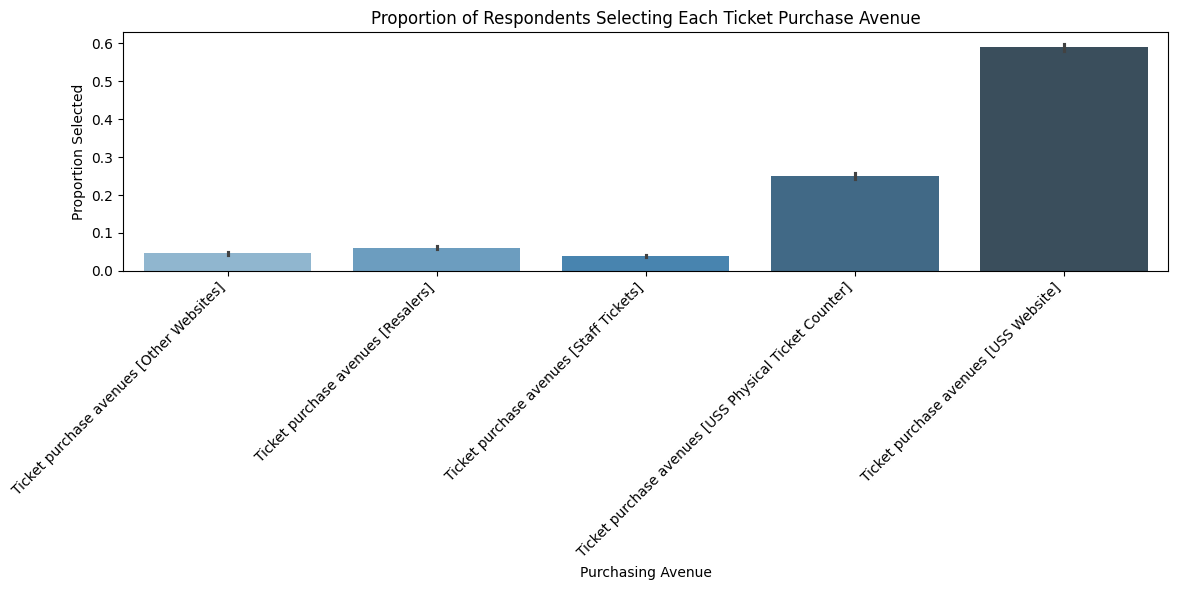

<ipython-input-2-7fdf25c173d8>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=count_data, x='Purchasing Avenue', y='Count', palette="Blues_d")


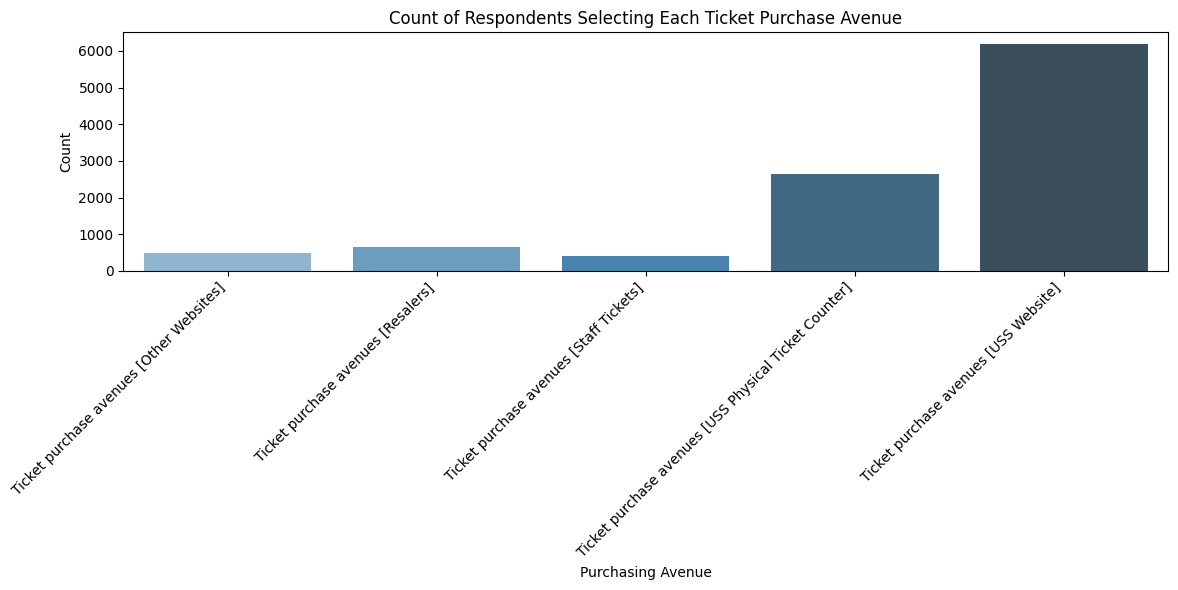

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_excel('/content/drive/MyDrive/DSA3101 Data/Processed Data/Survey_cleaned_balanced.xlsx')


ticket_purchasing_avenues = [
    'Ticket purchase avenues [Other Websites]',
    'Ticket purchase avenues [Resalers]',
    'Ticket purchase avenues [Staff Tickets]',
    'Ticket purchase avenues [USS Physical Ticket Counter]',
    'Ticket purchase avenues [USS Website]'
]

# verifying the column names
print(data.columns.tolist())

melted_data = pd.melt(data, value_vars=ticket_purchasing_avenues,
                      var_name='Purchasing Avenue', value_name='Average Score')

plt.figure(figsize=(12, 6))
sns.barplot(data=melted_data, x='Purchasing Avenue', y='Average Score', palette="Blues_d")
plt.title("Average Scores by Ticket Purchase Avenue")
plt.xlabel("Purchasing Avenue")
plt.ylabel("Average Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


##another visualisation - instead of average score i tried using proportion selected instead

plt.figure(figsize=(12, 6))
sns.barplot(data=melted_data, x='Purchasing Avenue', y='Average Score', palette="Blues_d")
plt.title("Proportion of Respondents Selecting Each Ticket Purchase Avenue")
plt.xlabel("Purchasing Avenue")
plt.ylabel("Proportion Selected")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## another visualisation

count_data = data[ticket_purchasing_avenues].sum().reset_index()
count_data.columns = ['Purchasing Avenue', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(data=count_data, x='Purchasing Avenue', y='Count', palette="Blues_d")
plt.title("Count of Respondents Selecting Each Ticket Purchase Avenue")
plt.xlabel("Purchasing Avenue")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
